IMPORT ALL THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
my_dataset =  pd.read_csv('/Users/ds_learner51/Downloads/segmentation data.csv')

In [3]:
my_dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
my_dataset.keys()

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
my_dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Correlation Heatmap

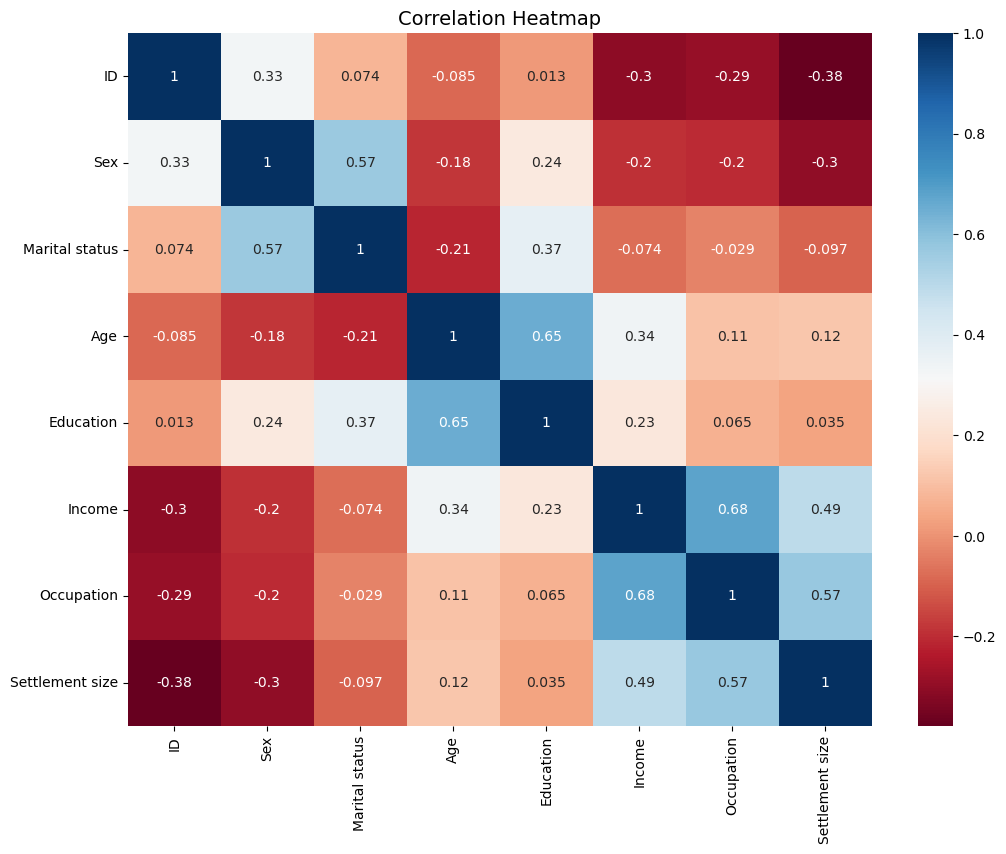

In [6]:
plt.figure(figsize=(12,9))
sns.heatmap(my_dataset.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()


The correletion between Education & Age is high, in order words we can say older people tend to be more highly educated

income and occupation?

Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.



In [7]:
# create scaler object
scaler = StandardScaler()
scaler.fit(my_dataset)

StandardScaler()

In [8]:
# scale the data
scaled_data=scaler.transform(my_dataset)
scaled_data

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

TO REDUCE DIMENSTION INTO 2

In [9]:
# Perform PCA with n_components=2 to reduce the variables to 2
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [10]:
x_pca=pca.transform(scaled_data)

In [11]:
scaled_data.shape

(2000, 8)

In [12]:
x_pca.shape

(2000, 2)

In [13]:
x_pca

array([[ 2.85978214,  0.93667597],
       [ 0.94413038,  0.39449213],
       [-0.02303213, -0.8817974 ],
       ...,
       [-1.84179778, -2.15868138],
       [-2.71683211,  0.56139001],
       [-2.2097949 , -2.42344957]])

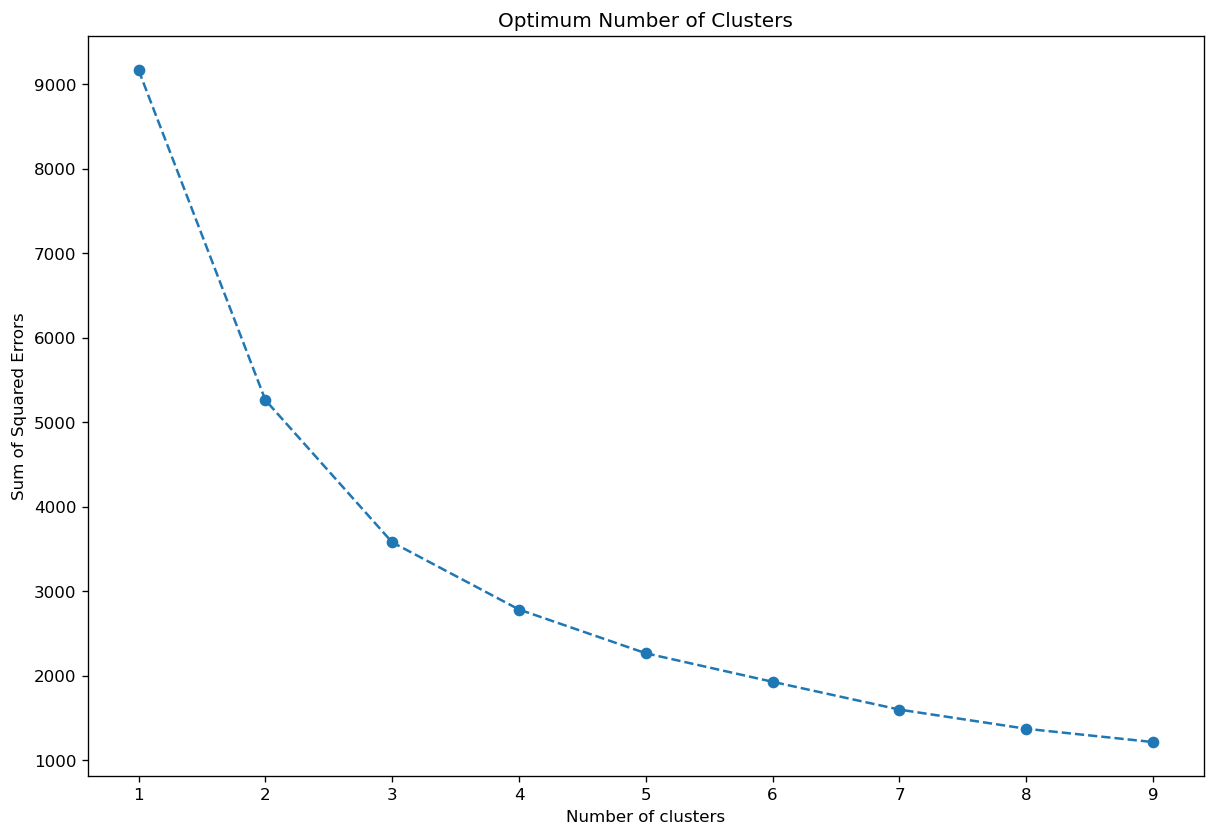

In [14]:
# Use the elbow method to find the optimum number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12,8), dpi=120)
plt.plot(range(1, 10), sse,'o--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Optimum Number of Clusters')
plt.show()

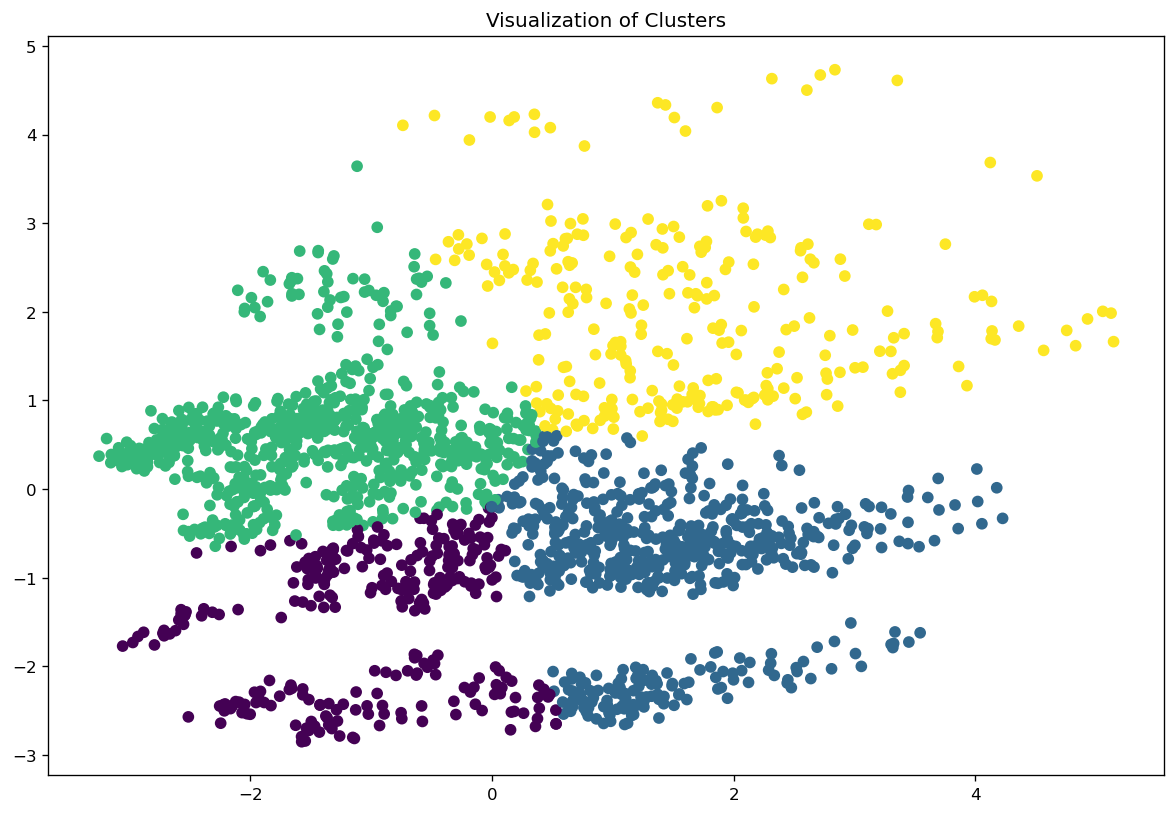

In [15]:

# Based on the elbow method, the optimum number of clusters is 4
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(x_pca)

# Get the cluster labels for each sample
labels = kmeans.labels_

# Plot the data, colored by cluster
plt.figure(figsize=(12,8), dpi=120)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.title('Visualization of Clusters')
plt.show()



Concatenate dataset with PCA

In [16]:
seg_pca_kmeans=pd.concat([my_dataset.reset_index(drop=True),pd.DataFrame(x_pca)],axis=1)

In [17]:
seg_pca_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124


In [18]:
seg_pca_kmeans['segment K-means PCA']=labels
seg_pca_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,segment K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,3
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,1
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,0
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,1
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1


Group Accordingly

In [19]:
seg_pca_kmeans['K segments']=seg_pca_kmeans['segment K-means PCA'].map({0:'K= one',1:'k=two',2:'k=three',3:'k=four'})
seg_pca_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,segment K-means PCA,K segments
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,3,k=four
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,1,k=two
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,0,K= one
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,1,k=two
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,1,k=two
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,2,k=three
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,2,k=three
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,0,K= one
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,2,k=three


After Grouping

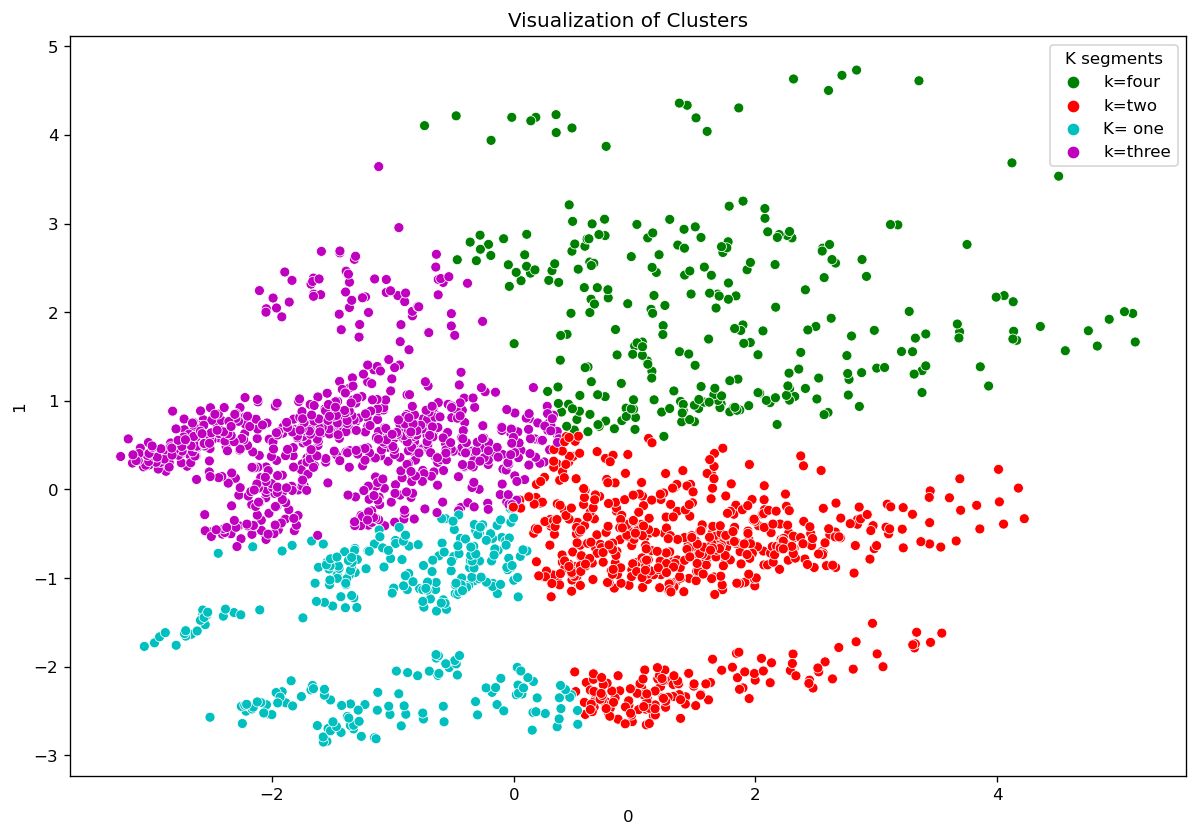

In [20]:
# Plot the data, colored by cluster
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans.iloc[:,-4], seg_pca_kmeans.iloc[:,-3], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
#plt.scatter(x_pca[:, 0], x_pca[:, 1], label=seg_pca_kmeans['segment'])
plt.title('Visualization of Clusters')
plt.show()

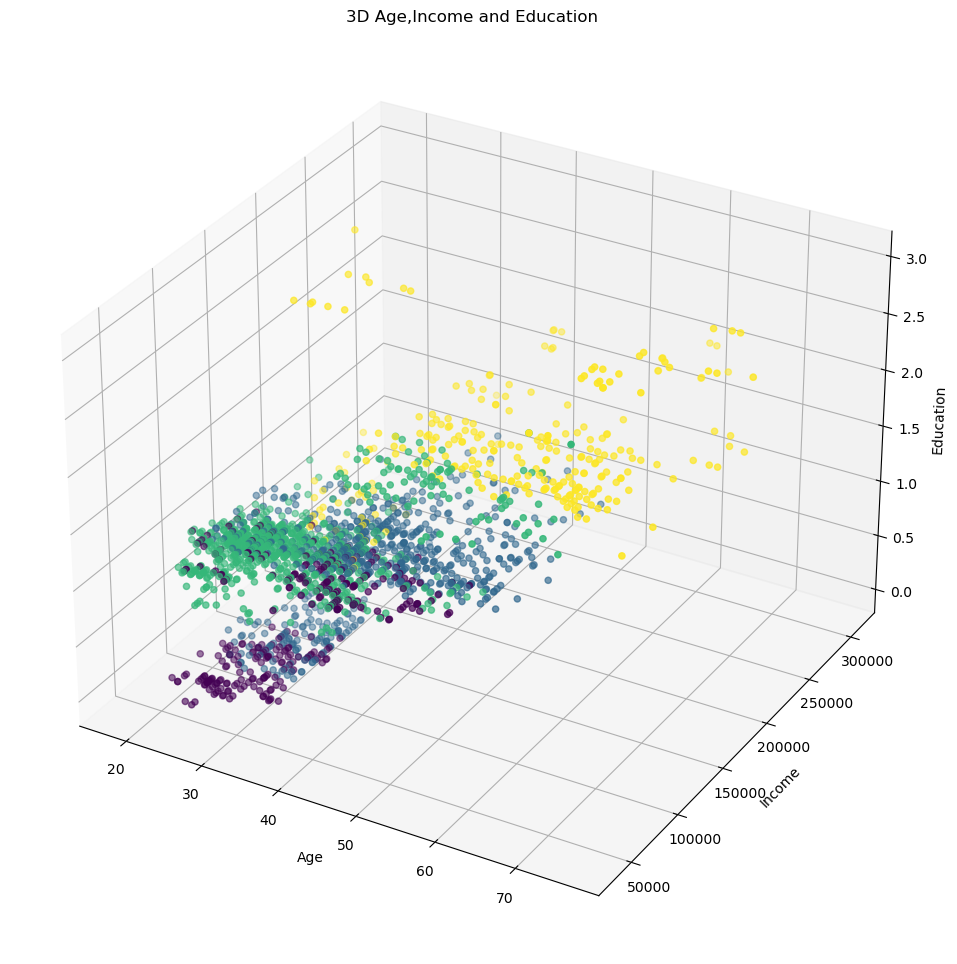

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Income'], seg_pca_kmeans['Education'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Education')
ax.set_title('3D Age,Income and Education')
plt.show()

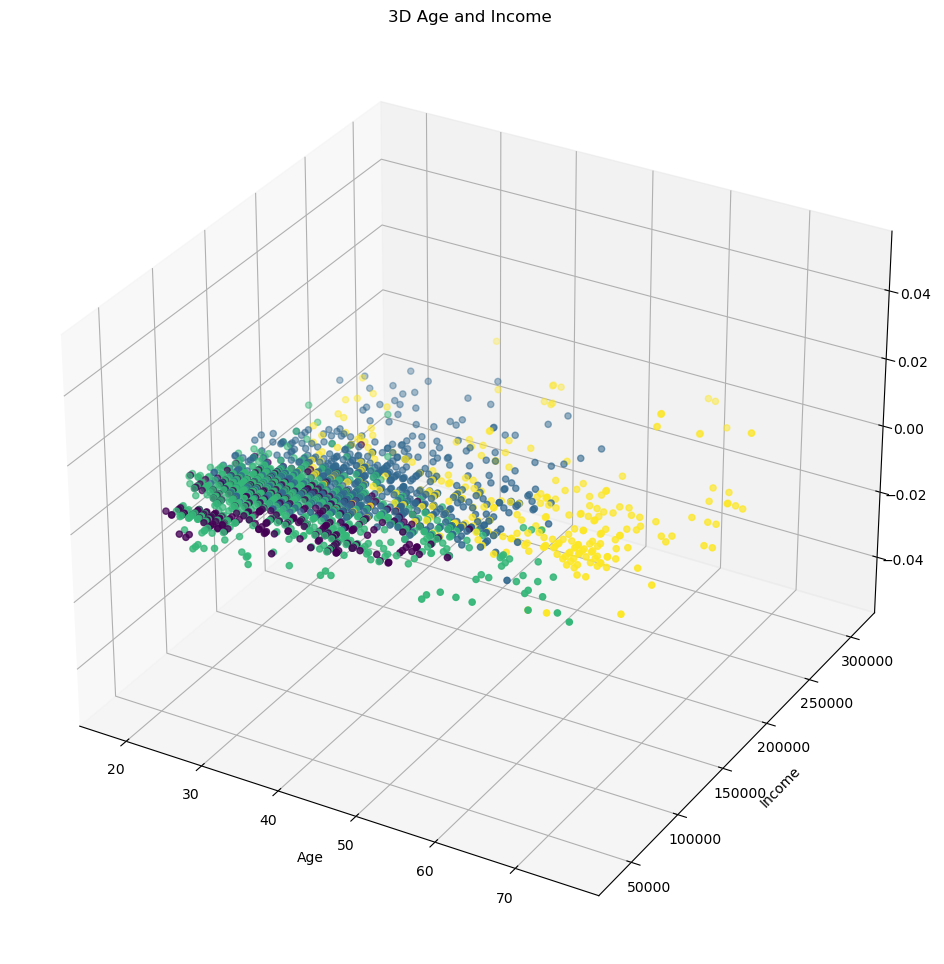

In [22]:
# x = seg_pca_kmeans['Age']
# y = df_seg_pca_kmeans['Income']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Income'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_title('3D Age and Income ')
plt.show()

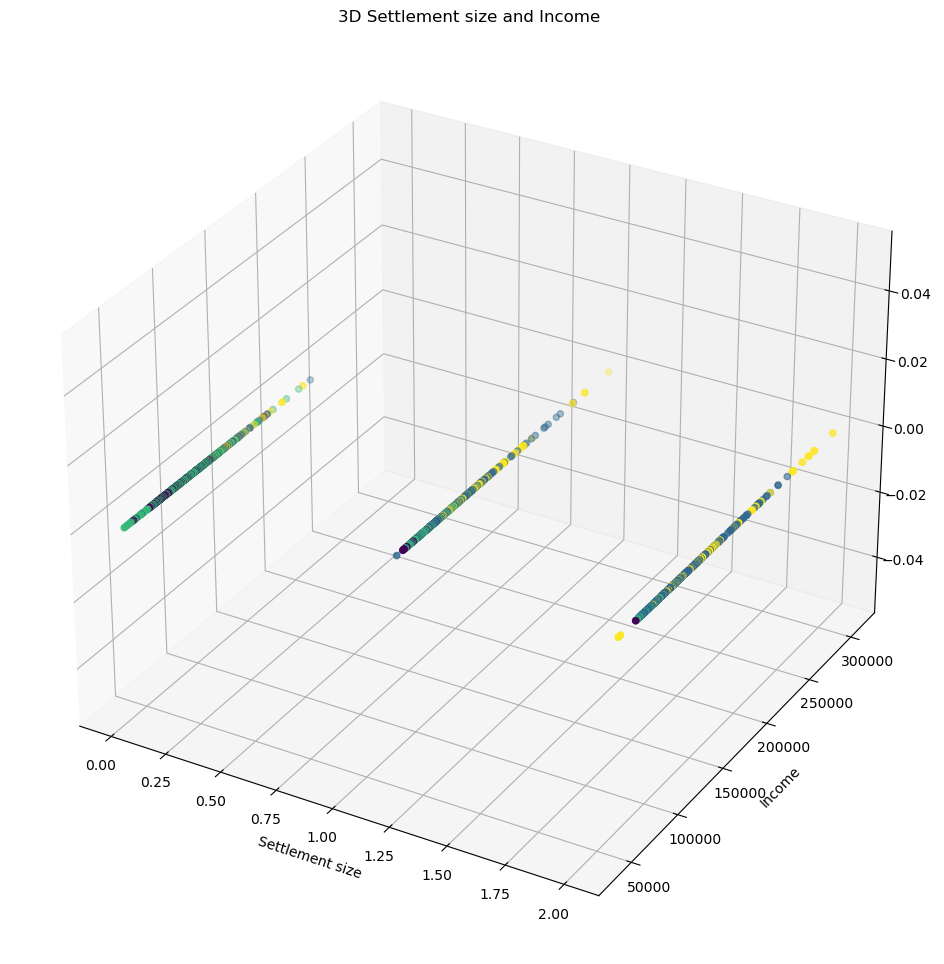

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(seg_pca_kmeans['Settlement size'], seg_pca_kmeans['Income'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Settlement size')
ax.set_ylabel('Income')
ax.set_title('3D Settlement size and Income ')
plt.show()

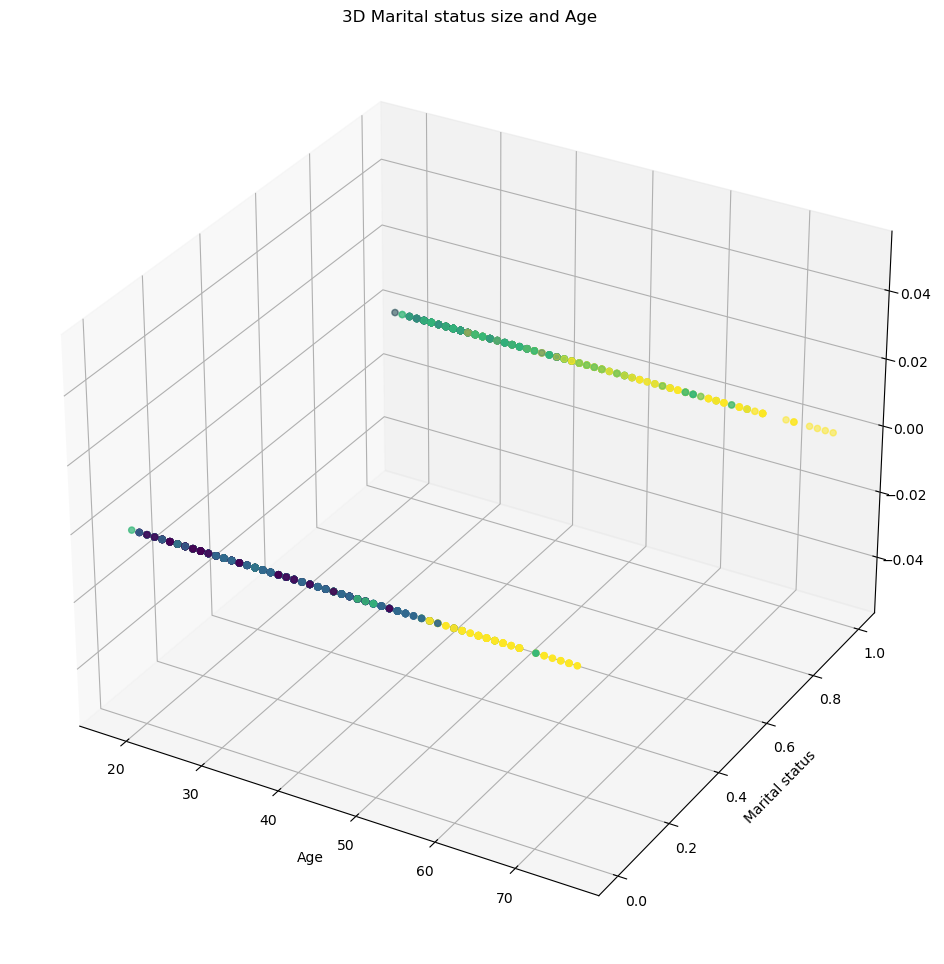

In [24]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Marital status'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Age')
ax.set_ylabel('Marital status')
ax.set_title('3D Marital status size and Age ')
plt.show()

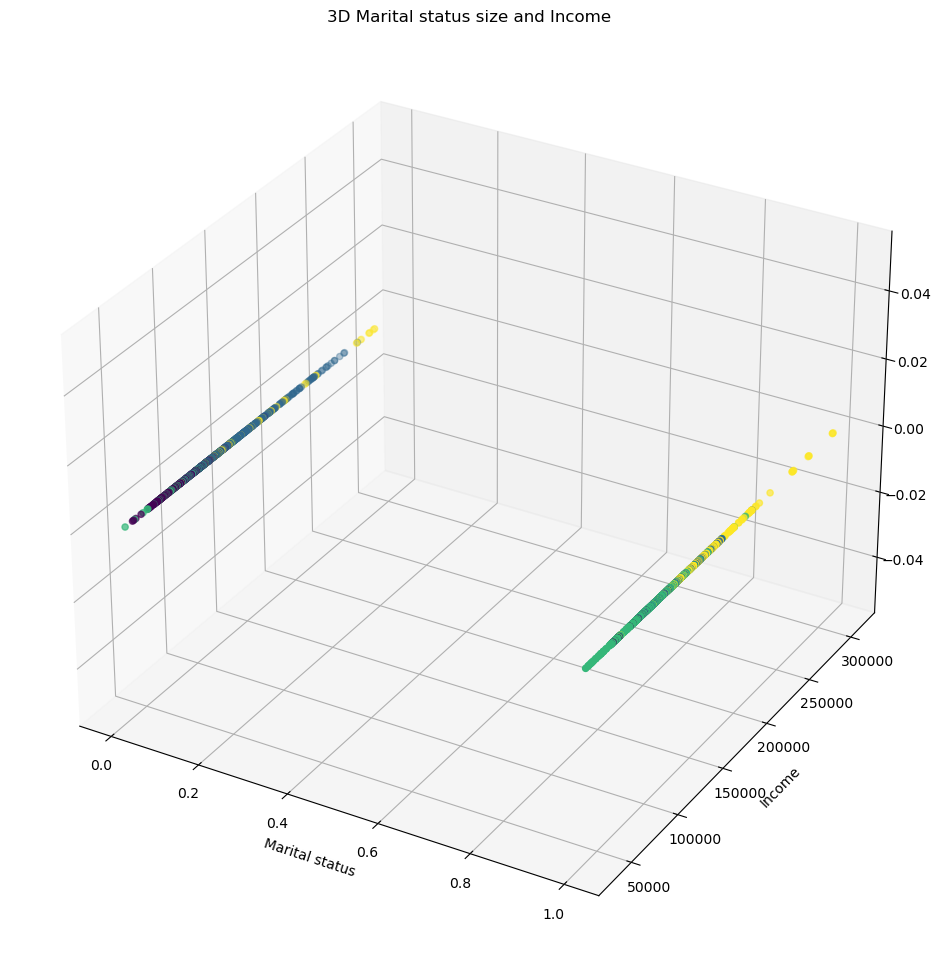

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(seg_pca_kmeans['Marital status'], seg_pca_kmeans['Income'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Marital status')
ax.set_ylabel('Income')
ax.set_title('3D Marital status size and Income ')
plt.show()

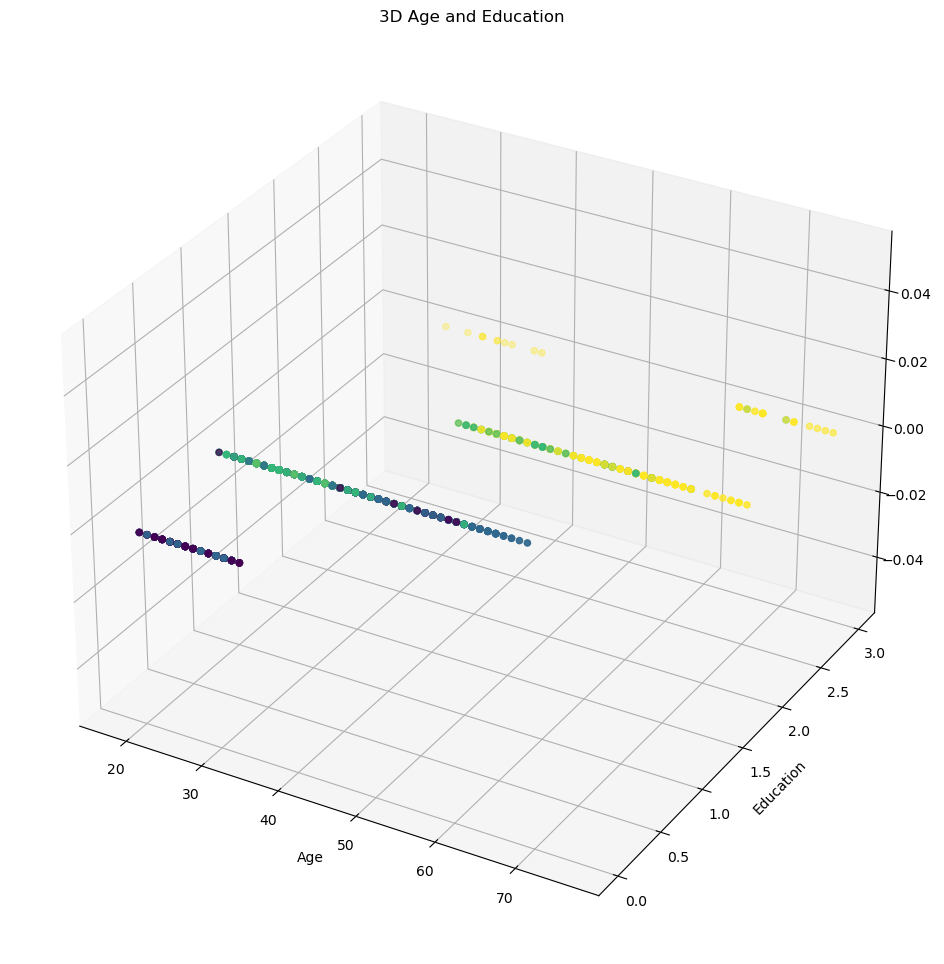

In [26]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(seg_pca_kmeans['Age'], seg_pca_kmeans['Education'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_title('3D Age and Education')
plt.show()

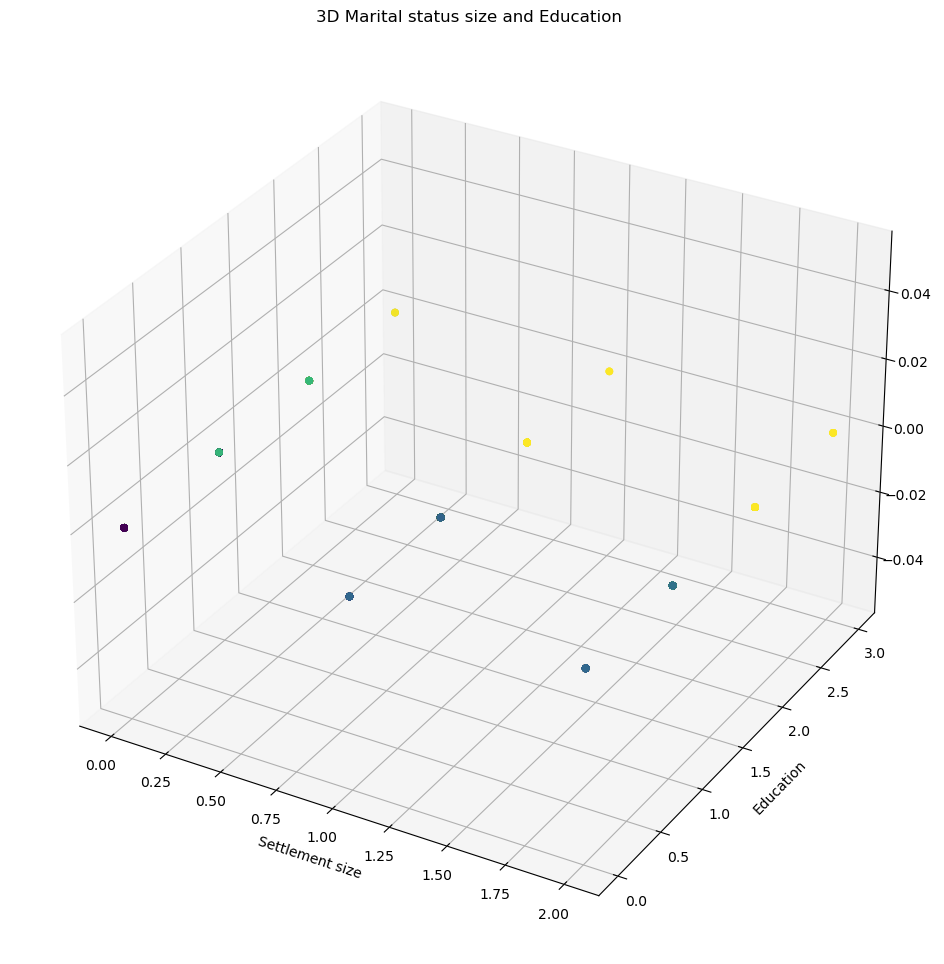

In [27]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(seg_pca_kmeans['Settlement size'], seg_pca_kmeans['Education'],c=seg_pca_kmeans['segment K-means PCA'])
ax.set_xlabel('Settlement size')
ax.set_ylabel('Education')
ax.set_title('3D Marital status size and Education ')
plt.show()